In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from cbsim.net import Net

<H1> Draw net function

In [2]:
def draw_graph(net, itscs):
    
    nodes = net.nodes
    min_x, max_x = 100, -100
    min_y, max_y = 100, -100
    for nd in nodes:
        if nd.x < min_x: min_x = nd.x
        if nd.y < min_y: min_y = nd.y
        if nd.x > max_x: max_x = nd.x
        if nd.y > max_y: max_y = nd.y
    # normalize coordinates
    for nd in nodes:
        nd.x = (nd.x - min_x) / (max_x - min_x)
        nd.y = (nd.y - min_y) / (max_y - min_y)
    for nd in nodes:
        nd.x, nd.y = nd.y, nd.x

    # draw graph
    G = nx.Graph()
    for nd in nodes:
        G.add_node(nd.nid, pos=(nd.y, nd.x))
    for lnk in net.links:
        G.add_edge(lnk.out_node.nid, lnk.in_node.nid)

    pos = nx.get_node_attributes(G, 'pos')

    color_map = {
        'R': 'darkblue',
        'H': 'blue',
        'S': 'purple',
        'P': 'red',
        'W': 'green',
        'N': 'grey',
    }
    node_type_name = {
        'R': 'Restaurants, bars, cafes',
        'H': 'Hotels, hostels, apartments to rent',
        'S': 'Grocery stores',
        'P': 'Other shopping stores',
        'W': 'Museums, theaters, universities, etc.',
        'N': 'Road intersections',
        'L': 'Loading points'
    }
    colors = [color_map.get(nd.type) for nd in nodes]

    fig = plt.figure(figsize=(18, 18))

    ax = fig.add_subplot(1, 1, 1)
    for label in sorted(color_map):
        ax.scatter([], [], color=color_map[label], label=node_type_name[label])

    nx.draw_networkx_nodes(G,
                        pos=pos,
                        nodelist=range(len(itscs)),
                        alpha=0.6,
                        node_color='black', #'white', 'black'
                        node_size=50
                        )
    nx.draw_networkx_nodes(G,
                        pos=pos,
                        nodelist=range(len(itscs), len(net.nodes)),
                        alpha=0.6,
                        node_color=colors[len(itscs):],
                        node_size=150
                        )

    # nx.draw_networkx_labels(G, pos, labels={nd: nd for nd in G.nodes()}, font_size=10)

    nx.draw_networkx_edges(G, 
                        pos=pos,
                        style='dotted')

    plt.axis('off')
    plt.legend(loc='upper right', fontsize=16, markerscale=2.0)
    fig.tight_layout()
    # plt.savefig("client_map_s.png", dpi=300)
    plt.show()

<H1> San Sebastian

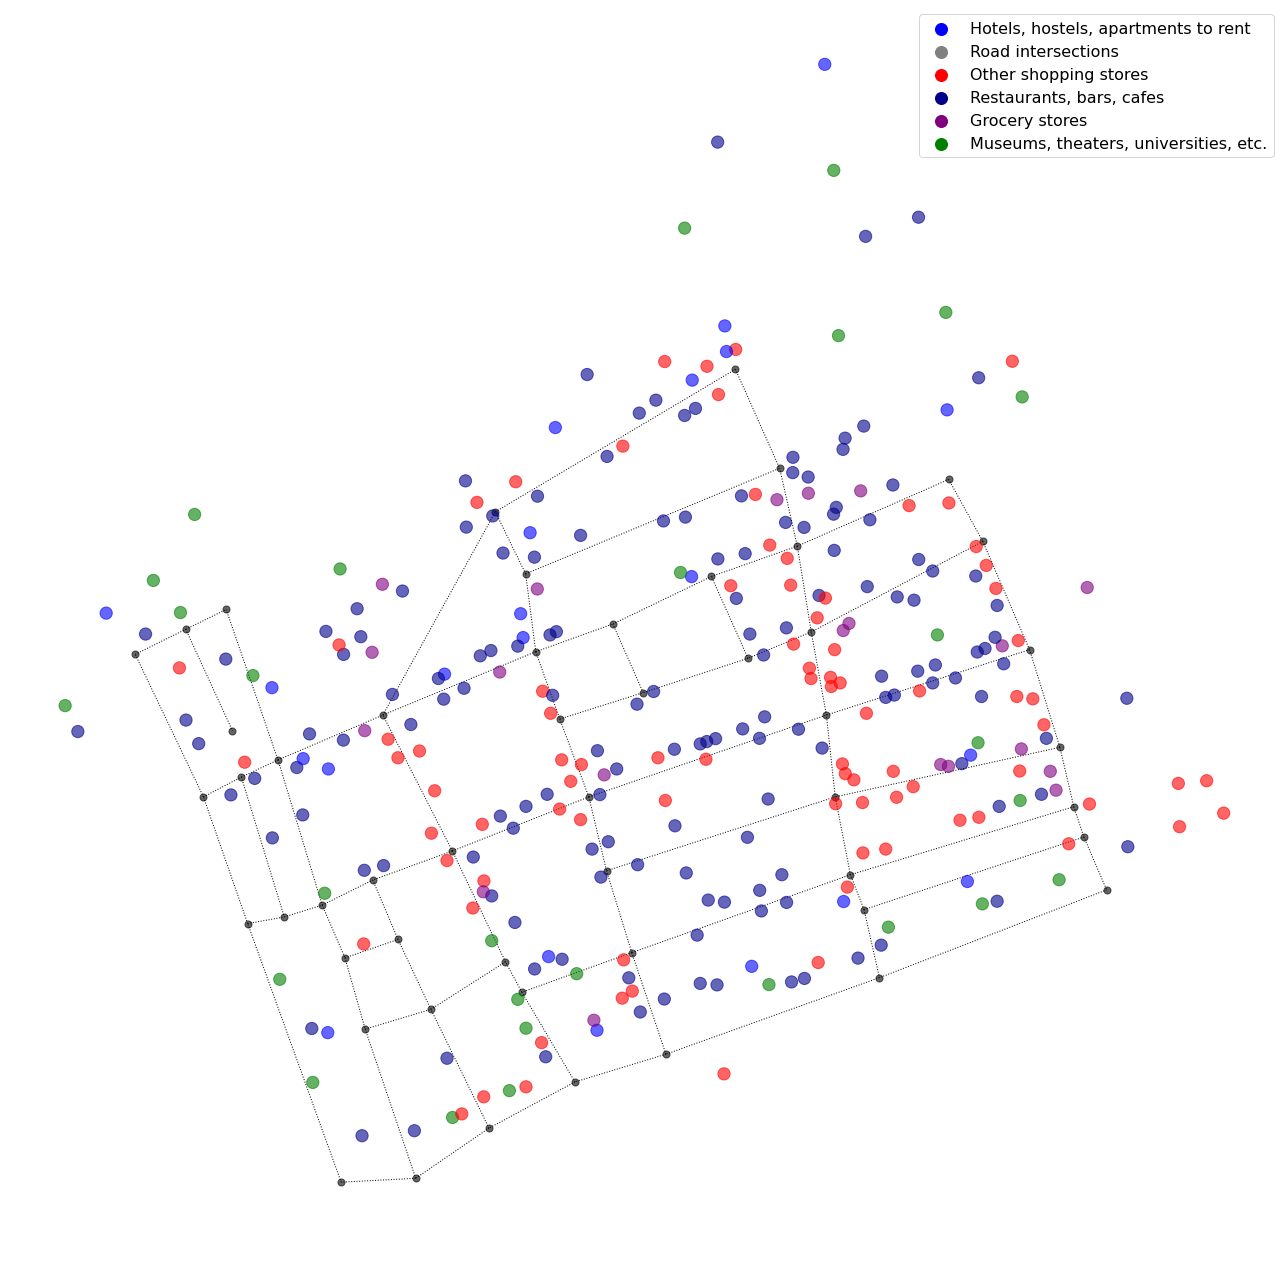

{'R': 148, 'H': 22, 'S': 20, 'P': 85, 'W': 28, 'N': 51, 'L': 0}

In [3]:
net = Net()
net.load_from_file(fnodes='ss-nodes.csv', flinks='ss-links.csv')

days = 6 # 7:00am-11:30am
fdata = {
    0: [[114, 108, 107, 51, 139, 114], [15, 11, 7, 5, 8, 2]],   # Calle San Juan
    1: [[103, 102, 88, 35, 118, 101], [17, 7, 6, 13, 10, 9]],   # Calle Inigo
    10: [[130, 127, 106, 47, 117, 78], [3, 11, 7, 5, 14, 18]],  # Boulevard
    21: [[47, 23, 43, 21, 45, 35], [25, 33, 27, 19, 42, 19]]    # Calle Ijentea
}
loadpoints = {0: 'A', 21: 'B'}

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).mean() / 2 )

probs = { 'R': 1, 'H': 1, 'S': 1, 'P': 1, 'W': 1 }
itscs = [nd for nd in net.nodes if nd.type == 'N']

draw_graph(net, itscs)

type_map = {'R': 0, 'H': 0, 'S': 0, 'P': 0, 'W': 0, 'N': 0, 'L': 0}
for nd in net.nodes:
    type_map[nd.type] += 1
type_map

<H1> Vitoria-Gasteiz

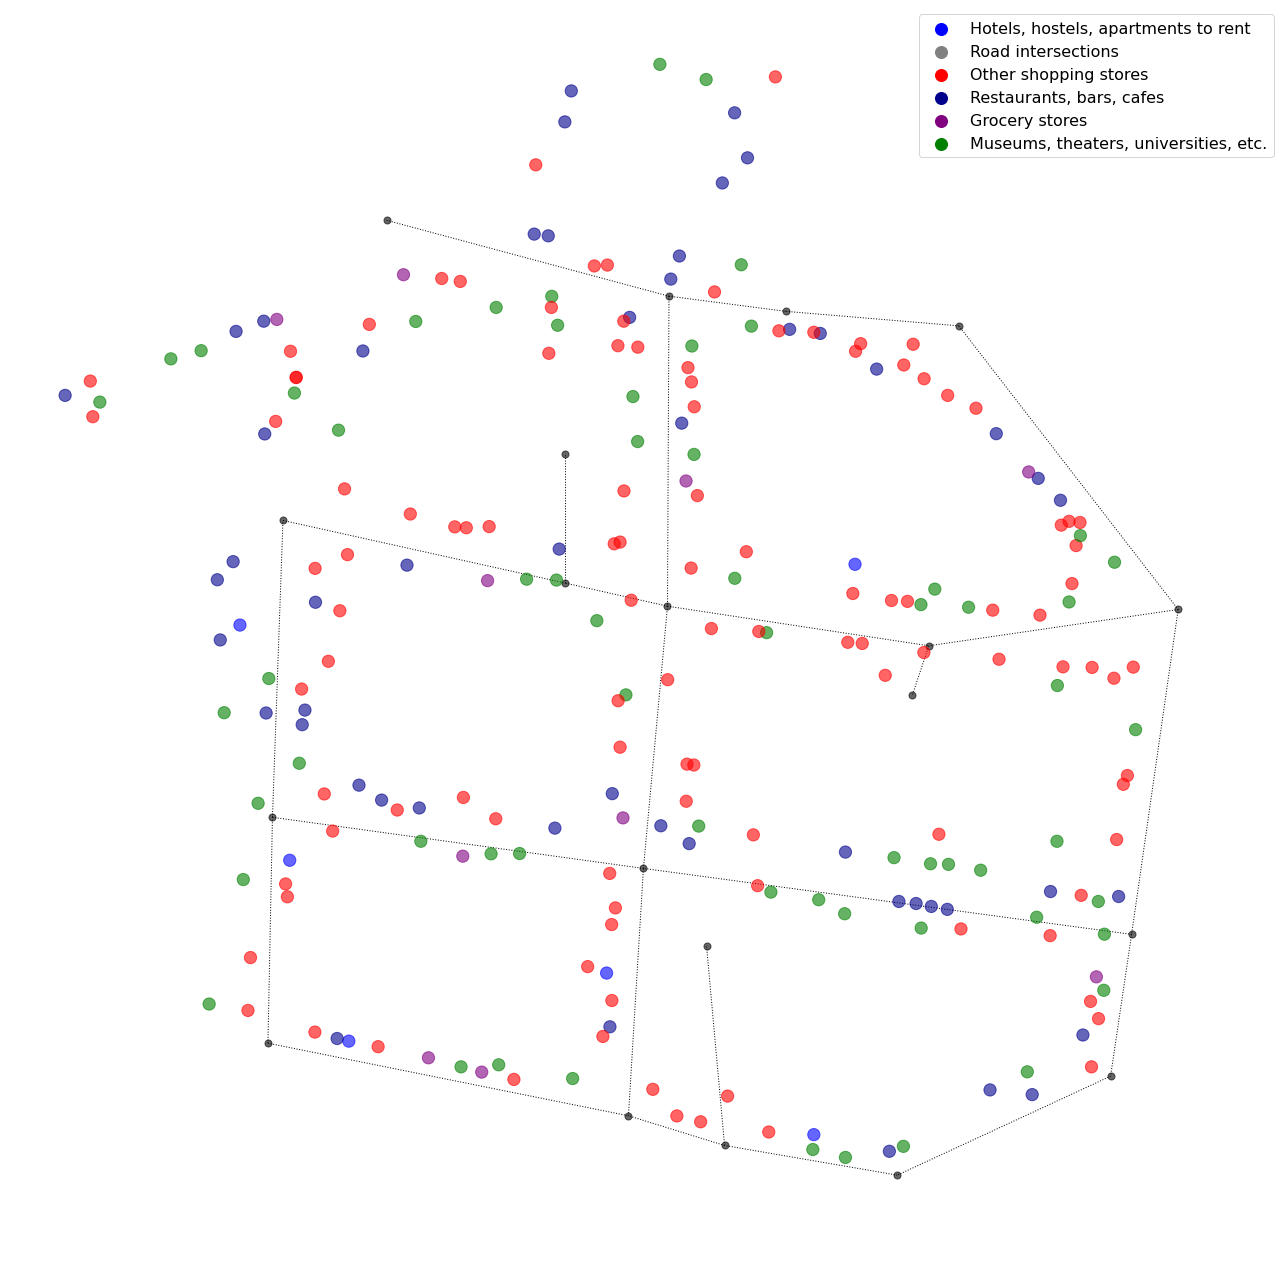

{'R': 51, 'H': 6, 'S': 10, 'P': 110, 'W': 61, 'N': 20, 'L': 0}

In [4]:
net = Net()
net.load_from_file(fnodes='vg-nodes.csv', flinks='vg-links.csv')

days = 5 # 1 hour (9am - 10am)
fdata = {
    3: [[29, 24, 19, 18, 30], [1, 0, 1, 0, 1]],         # Virgen Blanca
    5: [[52, 40, 36, 54, 40], [6, 7, 8, 10, 6]],        # Fueros
    1: [[9, 3, 1, 0, 1], [0, 0, 0, 0, 0]],              # Dato
    0: [[31, 40, 32, 32, 31], [34, 29, 43, 34, 32]],    # San Antonio / Florida
    6: [[42, 39, 26, 19, 25], [11, 14, 13, 16, 11]],    # Independencia
    4: [[26, 10, 16, 17, 16], [3, 1, 2, 1, 1]]          # Plaza de los Celedones de Oro
}

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).mean() * 2)

probs = { 'R': 1, 'H': 1, 'S': 1, 'P': 1, 'W': 1 }
loadpoints = {0: 'A'}
itscs = [nd for nd in net.nodes if nd.type == 'N']

draw_graph(net, itscs)

type_map = {'R': 0, 'H': 0, 'S': 0, 'P': 0, 'W': 0, 'N': 0, 'L': 0}
for nd in net.nodes:
    type_map[nd.type] += 1
type_map

<H1>Mechelen

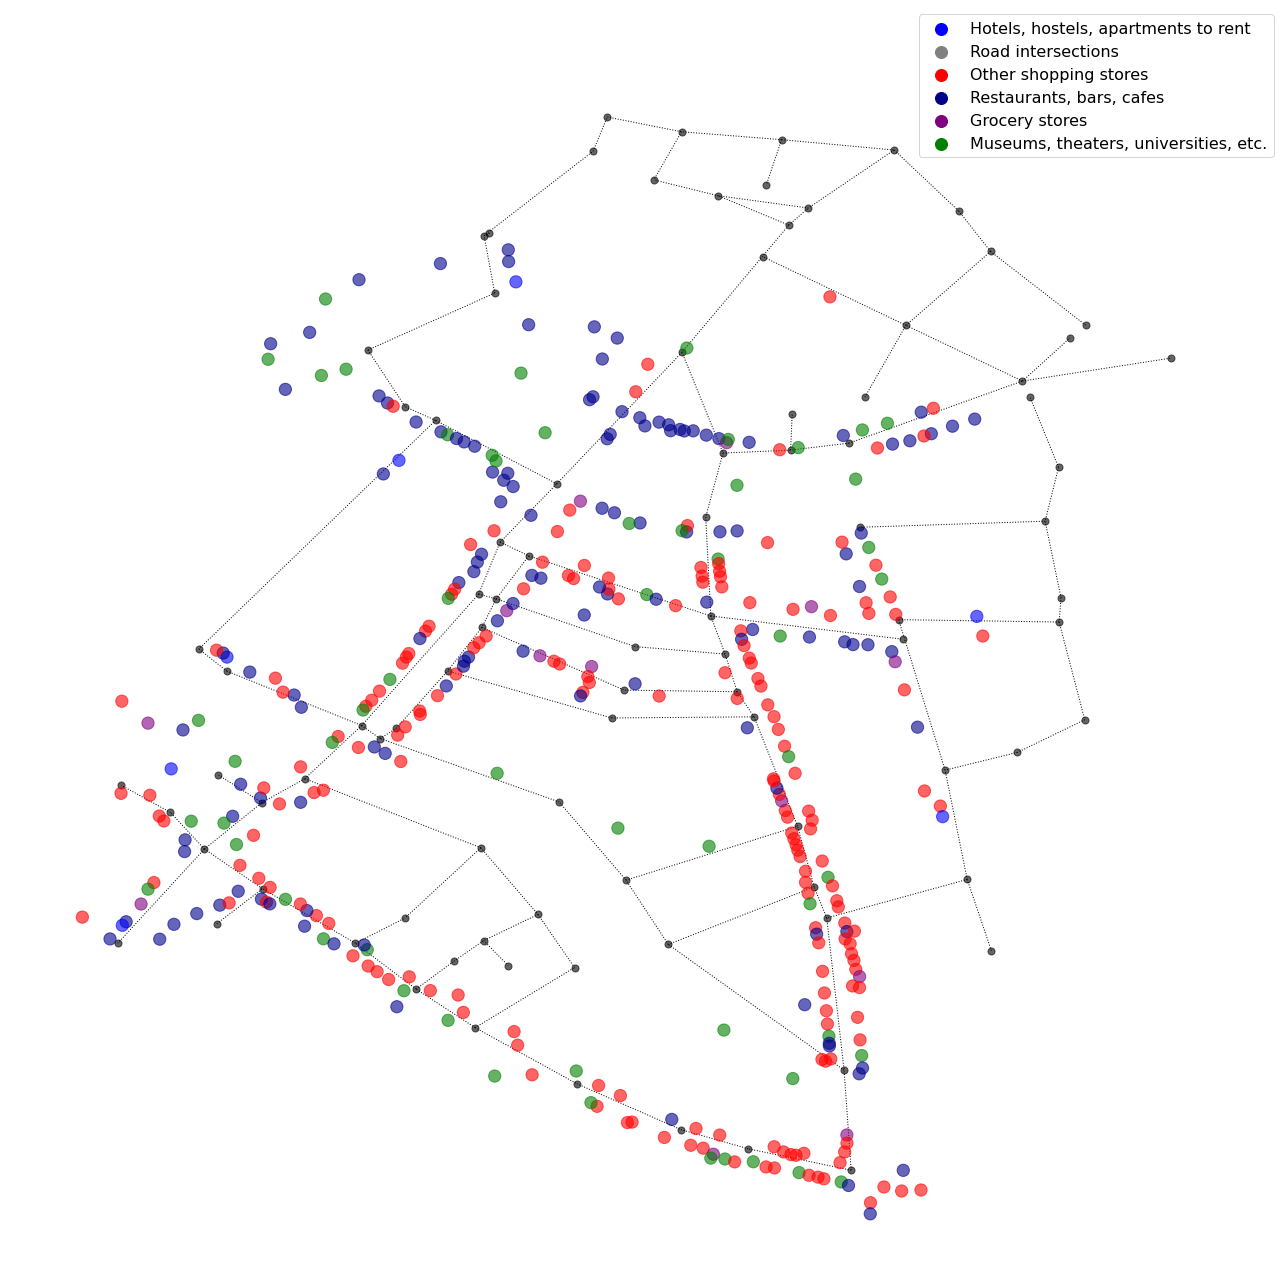

{'R': 126, 'H': 7, 'S': 13, 'P': 187, 'W': 56, 'N': 93, 'L': 0}

In [5]:
net = Net()
net.load_from_file(fnodes='mhln-nodes.csv', flinks='mhln-links.csv')

days = 5 # 2 hours (8:30am - 10:30am)
fdata = {
    0:  [[38, 43, 47, 53, 49], [37, 33, 26, 32, 54]],        # Vijfhoek
    6:  [[68, 72, 84, 68, 65], [131, 140, 110, 119, 124]],   # IJzerenleen
    15: [[113, 91, 87, 97, 97], [465, 490, 474, 476, 476]]   # Sint Kathelijnestraat 
}

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).mean())

probs = { 'R': 1, 'H': 1, 'S': 1, 'P': 1, 'W': 1 }
loadpoints = {0: 'A', 5: 'B', 16: 'C'}
itscs = [nd for nd in net.nodes if nd.type == 'N']

draw_graph(net, itscs)

type_map = {'R': 0, 'H': 0, 'S': 0, 'P': 0, 'W': 0, 'N': 0, 'L': 0}
for nd in net.nodes:
    type_map[nd.type] += 1
type_map

<h1> Dubrovnik

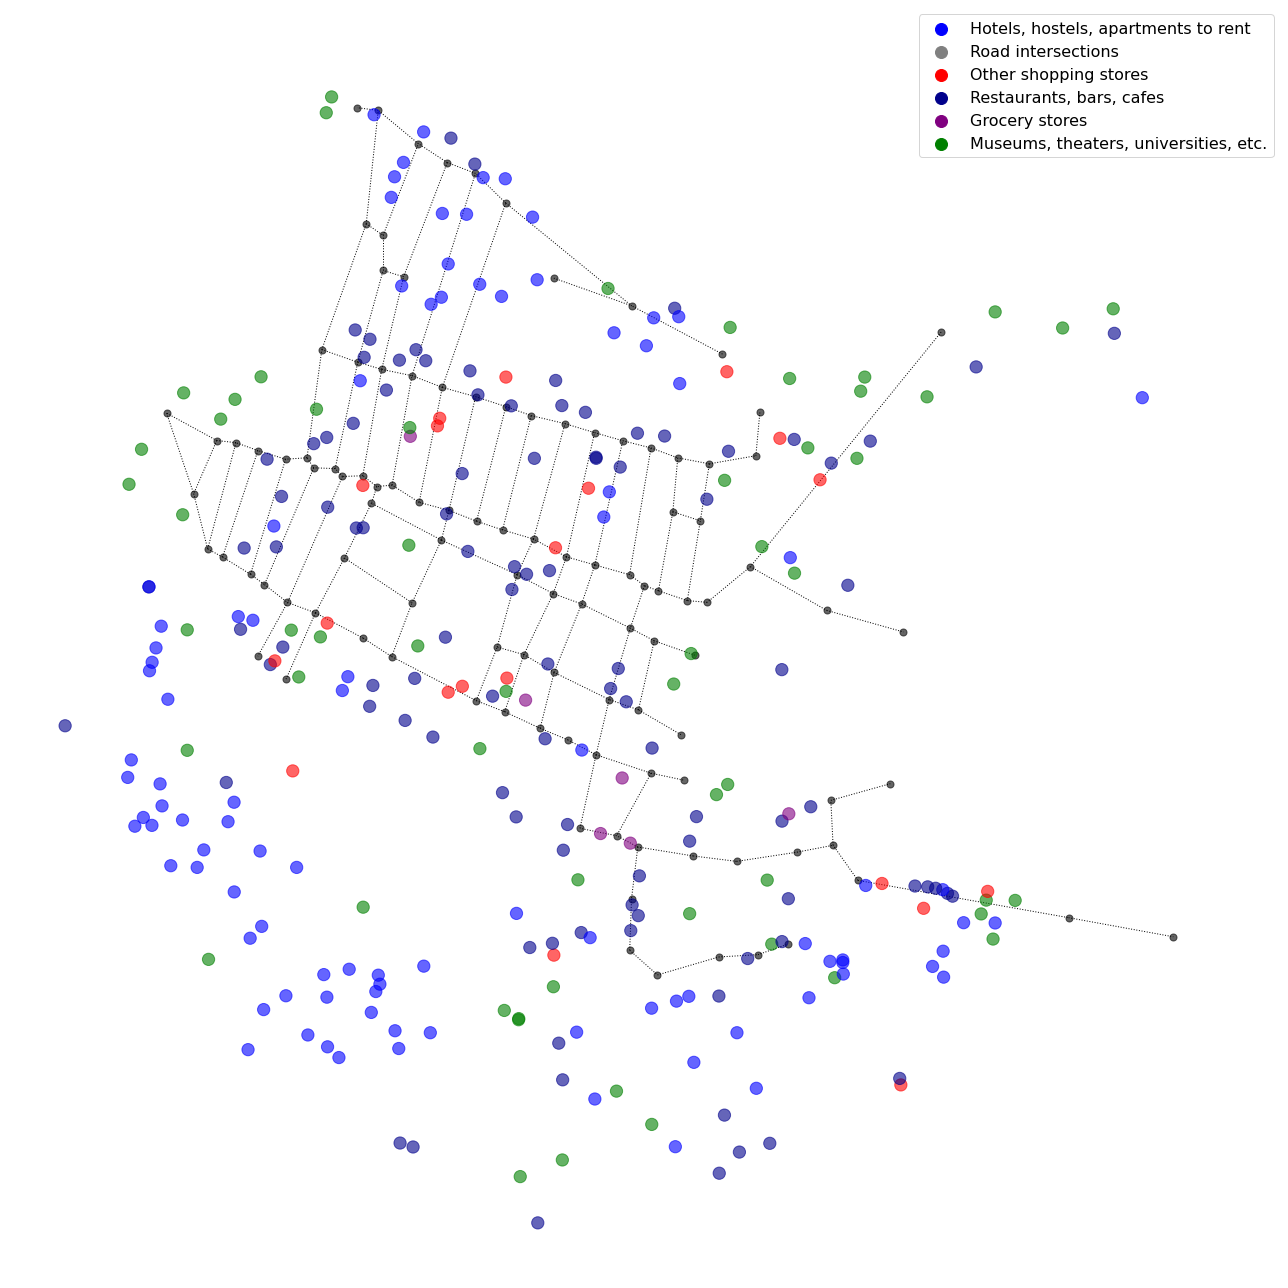

{'R': 101, 'H': 98, 'S': 6, 'P': 20, 'W': 57, 'N': 111, 'L': 0}

In [6]:
net = Net()
net.load_from_file(fnodes='dbr-nodes.csv', flinks='dbr-links.csv')

days = 5 # 1 hour (9:00am - 10:00am)
fdata = {
    0:  [[15, 11, 16, 12, 15], [1, 1, 1, 3, 1]] # Gate
}

flows = {}
for f in fdata:
    d = fdata[f]
    flows[f] = int(np.array([d[0][i] + d[1][i] for i in range(days)]).mean())

probs = { 'R': 1, 'H': 1, 'S': 1, 'P': 1, 'W': 1 }
loadpoints = {0: 'A'}
itscs = [nd for nd in net.nodes if nd.type == 'N']

draw_graph(net, itscs)

type_map = {'R': 0, 'H': 0, 'S': 0, 'P': 0, 'W': 0, 'N': 0, 'L': 0}
for nd in net.nodes:
    type_map[nd.type] += 1
type_map